In [2]:
#pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 11.7 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
#pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.3 MB/s eta 0:00:00m eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd

# For Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

- Fam file contains population/sample information
- Bim file contains information on the SNP position (basepair and centimorgan)
- parquet file contains the snp data

## _`fam` Dataset_

In [6]:
fam = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.fam", delimiter = " ", header = None).to_numpy()

In [7]:
print(fam[0])

['AA' 'AD_066' 0 0 0 1]


- `dtype('0')` in NumPy stands for "object" data type. This means that the array contains Python objects (e.g., strings, mixed types, or other non-primitive types).


In [8]:
columns = ["Family_ID", "Individual_ID", "Paternal_ID", "Maternal_ID", "Sex", "Phenotype"]

fam_df = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.fam", sep="\s+", names=columns)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_10581/3180771616.py:3: SyntaxWarning: invalid escape sequence '\s'
  fam_df = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.fam", sep="\s+", names=columns)


In [9]:
fam_df.head()

,Family_ID,Individual_ID,Paternal_ID,Maternal_ID,Sex,Phenotype
0,AA,AD_066,0,0,0,1
1,AA,AD_064,0,0,0,1
2,AA,AD_505,0,0,0,1
3,AA,AD_523,0,0,0,1
4,AA,AD_500,0,0,0,1


*.`fam (Sample Information)`: Contains family structure, individual ID, parental ID, sex, and phenotype. Links individuals to their genotype data.*


In [10]:
fam_df.Family_ID.value_counts()

Family_ID
Yoruba             70
French             61
Turkish            56
Spanish            53
Han                43
                   ..
Datog               3
Australian          3
Dolgan              3
Canary_Islander     2
Saami_WGA           1
Name: count, Length: 166, dtype: int64

In [11]:
(fam_df['Family_ID'] == "Yoruba").sum()

np.int64(70)

In [12]:
fam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Family_ID      2067 non-null   object
 1   Individual_ID  2067 non-null   object
 2   Paternal_ID    2067 non-null   int64 
 3   Maternal_ID    2067 non-null   int64 
 4   Sex            2067 non-null   int64 
 5   Phenotype      2067 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 97.0+ KB


In [13]:
fam_df.describe()

,Paternal_ID,Maternal_ID,Sex,Phenotype
count,2067.0,2067.0,2067.0,2067.0
mean,0.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,1.0
25%,0.0,0.0,0.0,1.0
50%,0.0,0.0,0.0,1.0
75%,0.0,0.0,0.0,1.0
max,0.0,0.0,0.0,1.0


In [14]:
# Count how many unique Family IDs
unique_families = np.unique(fam_df.iloc[:, 0])

f"Number of unique family IDs: {len(unique_families)}"

'Number of unique family IDs: 166'

In [15]:
duplicate_rows_fam_df = fam_df[fam_df.duplicated()]

"number of duplicate rows: ", duplicate_rows_fam_df.shape

('number of duplicate rows: ', (0, 6))

In [16]:
phenotype_column = fam_df.iloc[:, 5]

# Count the number of affected individuals
affected = np.sum(phenotype_column == 1)
print(f"Number of affected individuals: {affected}")

Number of affected individuals: 2067


## _`bim` Dataset_
 *This `.bim file` is a `PLINK BIM` (binary map) file used in genetics and bioinformatics. It provides information about genetic variants (SNPs) in a dataset.*

In [17]:
bim = np.genfromtxt("HO_data/HO_data_filtered/HumanOrigins2067_filtered.bim", usecols=(0, 1, 2, 3, 4, 5), dtype=str)

In [18]:
bim[0]

array(['1', 'rs3094315', '0.020130', '752566', 'G', 'A'], dtype='<U16')

- `dtype('<U16')` in NumPy means that the array contains Unicode strings with a maximum length of 16 characters.

In [19]:
columns = ["Chromosome", "SNP_ID", "Genetic_Distance", "Position", "Ref_Allele", "Alt_Allele"]

bim_df = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.bim", sep="\s+", names=columns)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_10581/211503307.py:3: SyntaxWarning: invalid escape sequence '\s'
  bim_df = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.bim", sep="\s+", names=columns)


In [20]:
bim_df.head()

,Chromosome,SNP_ID,Genetic_Distance,Position,Ref_Allele,Alt_Allele
0,1,rs3094315,0.020130,752566,G,A
1,1,rs7419119,0.022518,842013,G,T
2,1,rs13302957,0.024116,891021,G,A
3,1,rs6696609,0.024457,903426,T,C
4,1,rs8997,0.025727,949654,A,G


In [21]:
bim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160858 entries, 0 to 160857
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Chromosome        160858 non-null  int64  
 1   SNP_ID            160858 non-null  object 
 2   Genetic_Distance  160858 non-null  float64
 3   Position          160858 non-null  int64  
 4   Ref_Allele        160858 non-null  object 
 5   Alt_Allele        160858 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 7.4+ MB


*.`bim (Variant Information)`: Contains SNP markers, chromosome number, genetic position, and allele information.*

*.`SNP ID`: unique identifier for this SNP - Reference SNP identifier -rsID*

*.`Genetic Distance`: cM - Centimorgans -One centimorgan equals a 1% chance of recombination between two genetic markers/loci (representing the probability of recombination between two points)*

*.`Physical Position`: this SNP is located at base pair 752,566 on chromosome 1*

*.`Reference Allele`: G - major allele*

*.`Alternative Allele`: A - minor allele*

In [22]:
bim_df.describe()

,Chromosome,Genetic_Distance,Position
count,160858.000000,160858.000000,1.608580e+05
mean,8.991744,0.930690,7.849409e+07
std,5.945411,0.590934,5.802305e+07
min,1.000000,0.000013,1.968800e+04
25%,4.000000,0.473851,3.021285e+07
50%,8.000000,0.848425,6.873518e+07
75%,13.000000,1.299260,1.164211e+08
max,22.000000,2.862305,2.491684e+08


In [23]:
bim_df_duplicate = bim_df[bim_df.duplicated()]

"number of duplicate rows: ", bim_df_duplicate.shape

('number of duplicate rows: ', (0, 6))

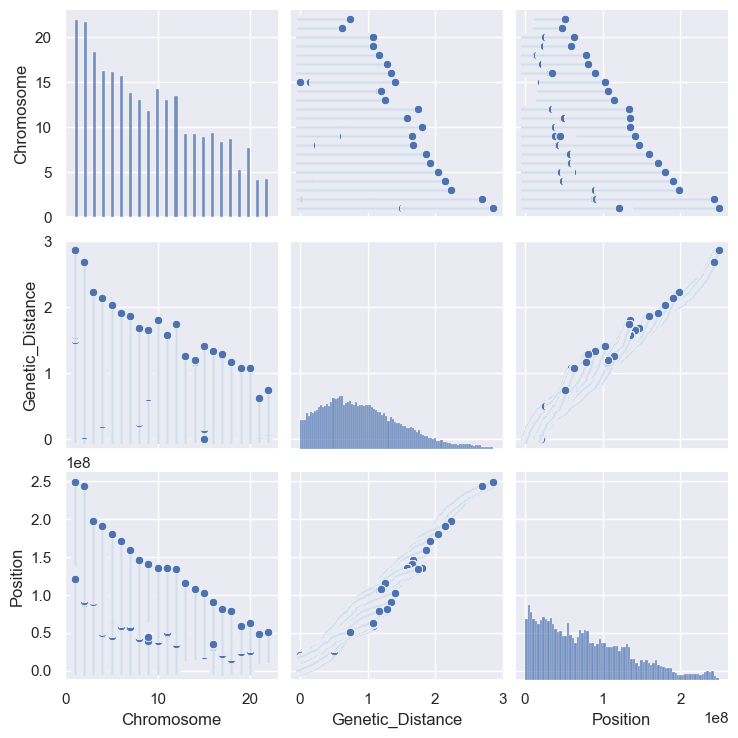

In [24]:
sns.pairplot(bim_df)

1 `Genetic Distance vs. Chromosome` (top left/middle plots):
Shows how genetic distance varies across different chromosomes (numbered 1-20). The genetic distance appears to generally decrease as chromosome number increases

2 `Genetic Distance vs. Position`
The roughly linear upward trend indicates that genetic distance tends to increase with physical position. This makes sense biologically, as the further apart two points are on a chromosome, the more likely recombination events will occur between them.The dots represent individual genetic markers or SNPs (Single Nucleotide Polymorphisms)

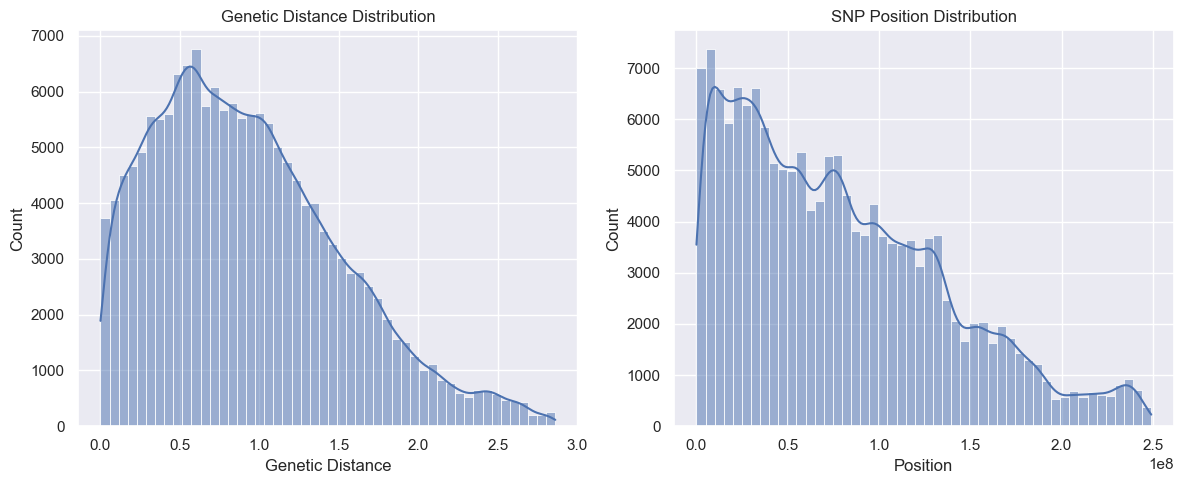

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(bim_df['Genetic_Distance'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Genetic Distance Distribution')
axes[0].set_xlabel('Genetic Distance')

sns.histplot(bim_df['Position'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('SNP Position Distribution')
axes[1].set_xlabel('Position')

plt.tight_layout()
plt.show()

- Most values are between 0.0 and 1.5 cM, with fewer SNPs at higher distances. Lower genetic distances indicate regions with low recombination. Higher distances may represent recombination hotspots.
- Non-uniform distribution in second plot indicates there are more SNPs in lower genomic positions, which gradually decrease as the position increases. Genome assembly artifacts,Some regions may have more SNPs due to sequencing biases. Mutation hotspots, Certain regions may be more prone to variation.

## _To understand recombination rates across a chromosome_

- The genetic distance (cM) represents the frequency of genetic recombination between points.
- The physical distance (bp) represents the actual number of DNA base pairs between points

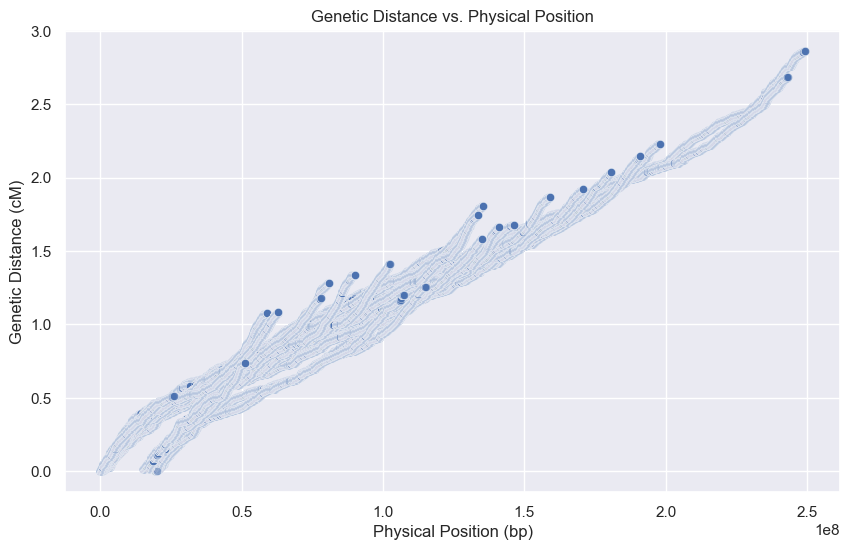

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bim_df['Position'], y=bim_df['Genetic_Distance'], alpha=0.5)
plt.xlabel('Physical Position (bp)')
plt.ylabel('Genetic Distance (cM)')
plt.title('Genetic Distance vs. Physical Position')
plt.show()

In [15]:
bim_df[['Genetic_Distance', 'Position']].corr()

,Genetic_Distance,Position
Genetic_Distance,1.000000,0.984721
Position,0.984721,1.000000


 - The correlation coefficient (0.984721) is very high, indicating a strong positive correlation between these two variables. As genetic distance increases, SNP position also increases. This makes sense because SNPs further apart on a chromosome tend to have greater genetic distances due to recombination.

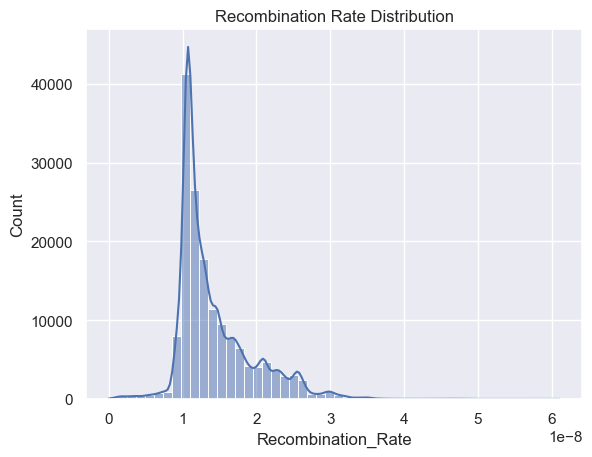

In [19]:
bim_df['Recombination_Rate'] = bim_df['Genetic_Distance'] / bim_df['Position']

# Plot recombination rate distribution
sns.histplot(bim_df['Recombination_Rate'], bins=50, kde=True)
plt.title('Recombination Rate Distribution')
plt.show()

In [16]:
# Calculate Q1 and Q3
Q1 = bim_df[['Genetic_Distance', 'Position']].quantile(0.25)
Q3 = bim_df[['Genetic_Distance', 'Position']].quantile(0.75)
IQR = Q3 - Q1

# Calculate outliers - to access the values separately
outliers = bim_df[
    (bim_df['Genetic_Distance'] < (Q1['Genetic_Distance'] - 1.5 * IQR['Genetic_Distance'])) | 
    (bim_df['Genetic_Distance'] > (Q3['Genetic_Distance'] + 1.5 * IQR['Genetic_Distance']))
]

print(f"Number of outliers: {len(outliers)}")

Number of outliers: 1836


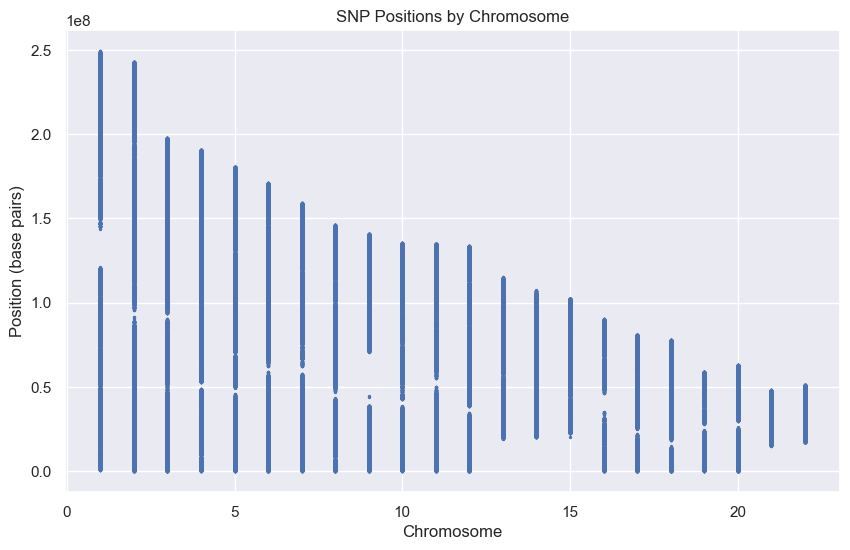

In [11]:
#Plot positions by chromosome (position distribution per chromosome)
plt.figure(figsize=(10, 6))
plt.scatter(bim_df["Chromosome"], bim_df["Position"], s=2)
plt.title("SNP Positions by Chromosome")
plt.xlabel("Chromosome")
plt.ylabel("Position (base pairs)")
plt.show()

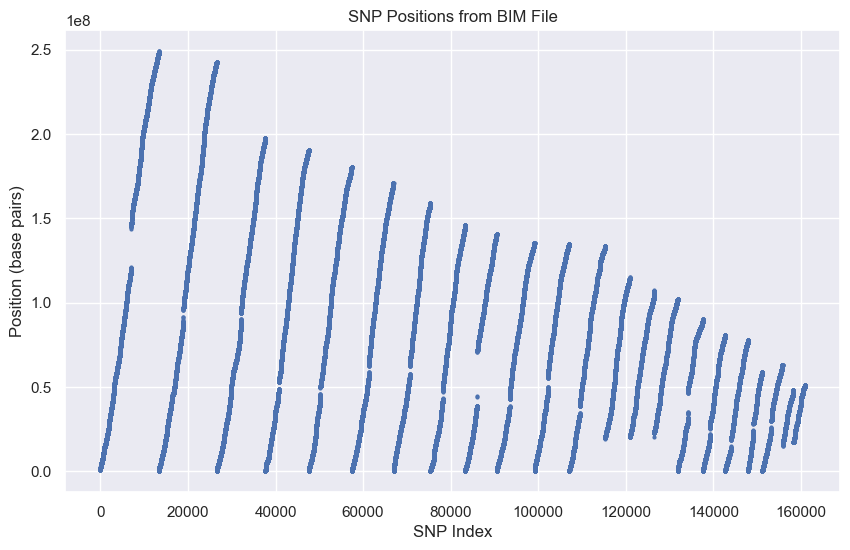

In [10]:
# Plot positions by SNP index
plt.figure(figsize=(10, 6))
plt.plot(bim_df.index, bim_df["Position"], 'o', markersize=2)
plt.title("SNP Positions from BIM File")
plt.xlabel("SNP Index")
plt.ylabel("Position (base pairs)")
plt.show()

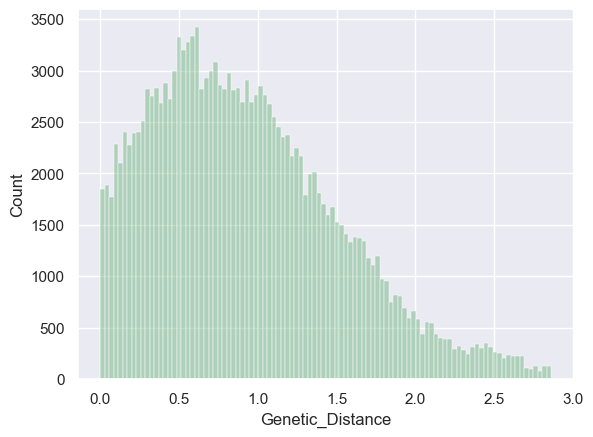

In [41]:
sns.histplot(bim_df['Genetic_Distance'], color='g', bins=100, alpha=0.4)
plt.show()

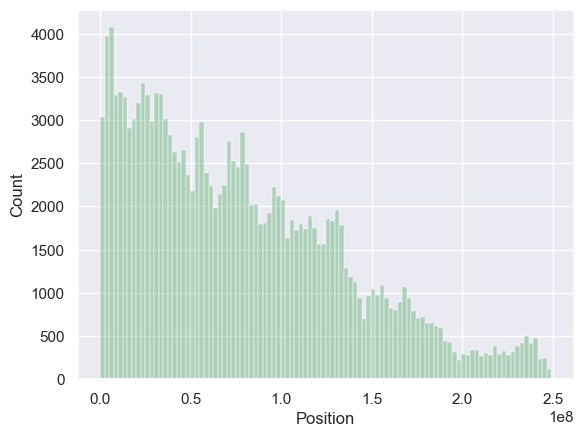

In [42]:
sns.histplot(bim_df['Position'], color='g', bins=100, alpha=0.4)
plt.show()

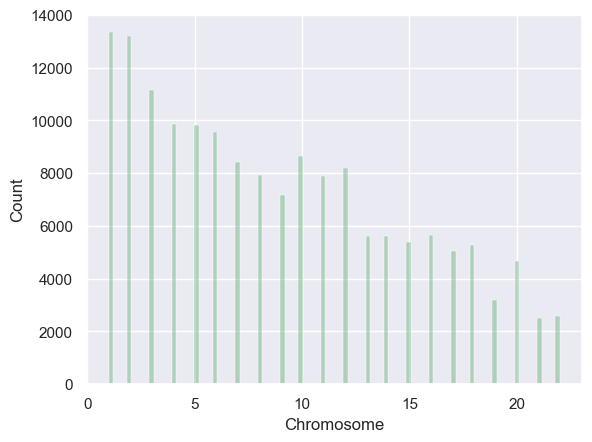

In [43]:
sns.histplot(bim_df['Chromosome'], color='g', bins=100, alpha=0.4)
plt.show()

## _`snp` Dataset_

In [25]:
# load dataset
snp_data = pd.read_parquet("HO_data/HO_data_filtered/HumanOrigins2067_filtered.parquet").to_numpy()

In [26]:
# unique values of xxx
print(np.unique(snp_data))

[0. 1. 2. 9.]


In [27]:
# numpy to dataframe
snp_data_df = pd.DataFrame(snp_data)

In [29]:
snp_data_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
count,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,...,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000,160858.000000
mean,0.456744,0.464658,0.439245,0.459324,0.447668,0.442800,0.463869,0.439095,0.449483,0.406253,...,0.363165,0.378396,0.352771,0.353921,0.462911,0.351733,0.355842,0.349812,0.354008,0.352273
std,0.857356,0.880367,0.738240,0.869027,0.802155,0.764393,0.866785,0.755820,0.820976,0.775762,...,0.810500,0.874970,0.757996,0.748606,1.216274,0.749528,0.773293,0.737285,0.761679,0.751060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [30]:
snp_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160858 entries, 0 to 160857
Columns: 2067 entries, 0 to 2066
dtypes: float64(2067)
memory usage: 2.5 GB


In [28]:
snp_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
snp_data_df.shape[0]

160858

- *This dataset contains genotype data for `160,858` individuals across `2,067` SNP markers. The values `(0, 1, 2)` represent different genotype states for each SNP, indicating the genetic variation between individuals.*

- *`Rows`: Each row corresponds to a person in the dataset - 160,858 individuals (rows)*

- *`Columns`: Each column corresponds to a specific SNP marker- 2,067 SNP markers (columns)*

- *`Values`: The values represent the genotypes for each individual and SNP. Genotypes are typically represented as:*

    - `0: Homozygous` reference (e.g., the individual has two copies of the reference allele).
    - `1: Heterozygous` (e.g., the individual has one copy of the reference allele and one copy of the alternate allele).
    - `2: Homozygous` alternate (e.g., the individual has two copies of the alternate allele).
    - `9: null` represent null/missing data (alternate `-1`)


In [41]:
# Get unique values in each column
unique_values_per_column = snp_data_df.apply(lambda col: col.unique())
unique_values_per_column

SNP_0                                         [1.0, 0.0, 2.0, 9.0]
SNP_1                                         [1.0, 0.0, 2.0, 9.0]
SNP_2                                         [1.0, 0.0, 2.0, 9.0]
SNP_3                                         [1.0, 0.0, 2.0, 9.0]
SNP_4                                         [1.0, 0.0, 2.0, 9.0]
                                       ...                        
SNP_2063                                      [0.0, 1.0, 2.0, 9.0]
SNP_2064                                      [1.0, 0.0, 2.0, 9.0]
SNP_2065                                      [0.0, 1.0, 2.0, 9.0]
SNP_2066                                      [0.0, 1.0, 2.0, 9.0]
Individual_ID    [AD_066, AD_064, AD_505, AD_523, AD_500, AD_51...
Length: 2068, dtype: object

In [29]:
# Check for missing values
missing_values = snp_data_df.isnull().sum()  # Sum of missing values per column
print(missing_values)

0       0
1       0
2       0
3       0
4       0
       ..
2062    0
2063    0
2064    0
2065    0
2066    0
Length: 2067, dtype: int64


In [2]:
def plot_genotype_hist(genotypes, filename):
    '''
    Plots a histogram of all genotype values in the flattened genotype matrix.

    :param genotypes: array of genotypes
    :param filename: filename (including path) to save plot to
    '''
    plt.figure()
    unique, counts = np.unique(genotypes, return_counts=True)
    d = zip(unique, counts)
    plt.hist(np.ndarray.flatten(genotypes), bins=50)
    if len(unique) < 5:
        plt.title(", ".join(["{:.2f} : {}".format(u, c) for (u, c) in d]), fontdict={'fontsize': 9})

    plt.savefig("{0}.pdf".format(filename))
    plt.close()

## *Minor Allele Frequency*
MAF tells you how common the minor allele (e.g., 1 or 2) is in the population.

In [44]:
def maf(snp_column):
    counts = snp_column.value_counts(normalize=True)
    return min(counts)  # Minor allele frequency is the least frequent value

maf_values = snp_data_df.drop('Individual_ID', axis=1).apply(maf)
print(maf_values)

SNP_0       0.004725
SNP_1       0.005191
SNP_2       0.001946
SNP_3       0.004992
SNP_4       0.003444
              ...   
SNP_2062    0.002686
SNP_2063    0.003164
SNP_2064    0.002462
SNP_2065    0.002928
SNP_2066    0.002754
Length: 2067, dtype: float64


In [32]:
snp_data_df.columns

Index(['SNP_0', 'SNP_1', 'SNP_2', 'SNP_3', 'SNP_4', 'SNP_5', 'SNP_6', 'SNP_7',
       'SNP_8', 'SNP_9',
       ...
       'SNP_2058', 'SNP_2059', 'SNP_2060', 'SNP_2061', 'SNP_2062', 'SNP_2063',
       'SNP_2064', 'SNP_2065', 'SNP_2066', 'Individual_ID'],
      dtype='object', length=2068)

In [33]:
snp_data_df["Individual_ID"] = fam_df["Individual_ID"]  # Add Individual ID

# .Fam + snp
merged_df = fam_df.merge(snp_data_df, on="Individual_ID")  # Merge phenotype & genotypes

In [34]:
merged_df

,Family_ID,Individual_ID,Paternal_ID,Maternal_ID,Sex,Phenotype,SNP_0,SNP_1,SNP_2,SNP_3,...,SNP_2057,SNP_2058,SNP_2059,SNP_2060,SNP_2061,SNP_2062,SNP_2063,SNP_2064,SNP_2065,SNP_2066
0,AA,AD_066,0,0,0,1,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,AA,AD_064,0,0,0,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,AA,AD_505,0,0,0,1,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,AA,AD_523,0,0,0,1,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,AA,AD_500,0,0,0,1,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,Zapotec,Zapo0082,0,0,0,1,0.0,0.0,0.0,1.0,...,2.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2063,Zapotec,Zapo0083,0,0,0,1,0.0,0.0,0.0,1.0,...,2.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0
2064,Zapotec,Zapo0091,0,0,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2065,Zapotec,Zapo0095,0,0,0,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0


In [35]:
# Melt the SNP dataframe to long format for merging with BIM
snp_long = merged_df.melt(id_vars=['Individual_ID', 'Family_ID', 'Paternal_ID', 'Maternal_ID', 'Sex', 'Phenotype'],
                          var_name="SNP_Column",
                          value_name="Genotype")

In [36]:
snp_long

,Individual_ID,Family_ID,Paternal_ID,Maternal_ID,Sex,Phenotype,SNP_Column,Genotype
0,AD_066,AA,0,0,0,1,SNP_0,1.0
1,AD_064,AA,0,0,0,1,SNP_0,0.0
2,AD_505,AA,0,0,0,1,SNP_0,0.0
3,AD_523,AA,0,0,0,1,SNP_0,2.0
4,AD_500,AA,0,0,0,1,SNP_0,1.0
...,...,...,...,...,...,...,...,...
4272484,Zapo0082,Zapotec,0,0,0,1,SNP_2066,1.0
4272485,Zapo0083,Zapotec,0,0,0,1,SNP_2066,1.0
4272486,Zapo0091,Zapotec,0,0,0,1,SNP_2066,0.0
4272487,Zapo0095,Zapotec,0,0,0,1,SNP_2066,0.0
